In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


In [40]:
df.columns


Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'PRODUCTLINE',
       'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [41]:
df = pd.read_csv('task_7.csv')

conn = sqlite3.connect(':memory:')

df.to_sql('sales', conn, index=False, if_exists='replace')

2823

In [46]:
import sqlite3

conn = sqlite3.connect(":memory:")

df.to_sql("sales", conn, index=False, if_exists="replace")

query = """
SELECT 
    PRODUCTCODE AS product,
    SUM(QUANTITYORDERED) AS total_qty,
    SUM(QUANTITYORDERED * PRICEEACH) AS revenue
FROM sales
GROUP BY PRODUCTCODE
ORDER BY revenue DESC
LIMIT 30
"""

result = pd.read_sql_query(query, conn)
print(result)

      product  total_qty    revenue
0    S18_3232       1774  176026.63
1    S24_3856       1052  103489.89
2    S18_4600       1031  101835.00
3    S24_2300        996   99600.00
4    S18_2238        966   96300.00
5    S10_1949        961   96100.00
6    S18_2319        993   95780.80
7    S12_1666        972   95738.73
8    S12_4473       1024   95489.58
9    S12_2823        964   95367.08
10   S18_1097        999   94660.69
11   S50_1392        979   94486.98
12   S18_1129        947   93984.32
13   S18_3856        997   93834.24
14   S18_2949        991   93555.78
15   S24_2011        960   92953.47
16   S18_3685        948   92366.94
17   S12_4675        964   92205.78
18   S18_4027        922   92200.00
19   S18_1662        940   91656.93
20   S18_1342        997   91502.67
21   S24_1578        931   91158.26
22   S12_1108        973   91070.50
23   S10_4698        921   90912.30
24  S700_2824        976   90571.66
25   S10_4757        952   89439.82
26  S700_2466        940   8

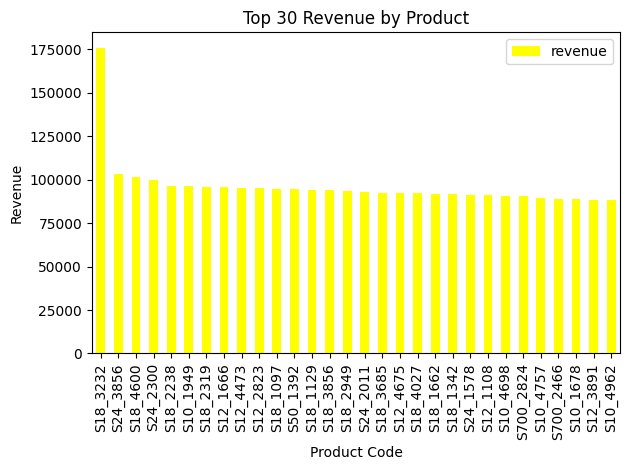

In [48]:
import matplotlib.pyplot as plt
result.plot(kind='bar', x='product', y='revenue', title='Top 30 Revenue by Product', color='yellow')
plt.xlabel('Product Code')
plt.ylabel('Revenue')
plt.tight_layout()
plt.savefig('sales_chart.png')
plt.show()

In [21]:
top_qty_product = result.sort_values(by='total_qty', ascending=False).head(1)
print("Best-selling product (by quantity):")
print(top_qty_product)


Best-selling product (by quantity):
    product  total_qty    revenue
0  S18_3232       1774  176026.63


In [22]:
top_revenue_product = result.sort_values(by='revenue', ascending=False).head(1)
print("Highest revenue-generating product:")
print(top_revenue_product)


Highest revenue-generating product:
    product  total_qty    revenue
0  S18_3232       1774  176026.63


In [23]:
summary_query = """
SELECT 
    COUNT(DISTINCT PRODUCTCODE) AS total_products,
    SUM(QUANTITYORDERED) AS total_quantity,
    SUM(QUANTITYORDERED * PRICEEACH) AS total_revenue
FROM sales
"""
summary = pd.read_sql_query(summary_query, conn)
print("Total Summary:")
print(summary)


Total Summary:
   total_products  total_quantity  total_revenue
0             109           99067     8290886.79


In [43]:
import pandas as pd
import sqlite3

df = pd.read_csv("task_7.csv")
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')
df['Month'] = df['ORDERDATE'].dt.to_period('M').astype(str)
conn = sqlite3.connect(":memory:")
df.to_sql("sales", conn, index=False, if_exists="replace")

query = """
SELECT 
    Month AS month,
    SUM(QUANTITYORDERED * PRICEEACH) AS monthly_revenue
FROM sales
GROUP BY Month
ORDER BY Month
"""

monthly_revenue = pd.read_sql_query(query, conn)
print(monthly_revenue)


      month  monthly_revenue
0   2022-01         78827.36
1   2022-02        101953.39
2   2022-03         94812.13
3   2022-04         93280.52
4   2022-05         71523.00
5   2022-06         88971.28
6   2022-07        107334.61
7   2022-08         62587.53
8   2022-09        108157.38
9   2022-10         87716.11
10  2022-11         90802.75
11  2022-12         91789.06
12  2023-01        117515.62
13  2023-02         88526.32
14  2023-03         70396.25
15  2023-04         73731.74
16  2023-05         94440.86
17  2023-06         73045.78
18  2023-07        101436.85
19  2023-08        101764.13
20  2023-09        113517.36
21  2023-10        111751.34
22  2023-11         97632.85
23  2023-12         91485.36
24  2024-01        106388.84
25  2024-02         98099.04
26  2024-03         76303.64
27  2024-04         95387.54
28  2024-05         74151.91
29  2024-06         78789.08
30  2024-07         74392.60
31  2024-08        117520.91
32  2024-09         76776.61
33  2024-10   

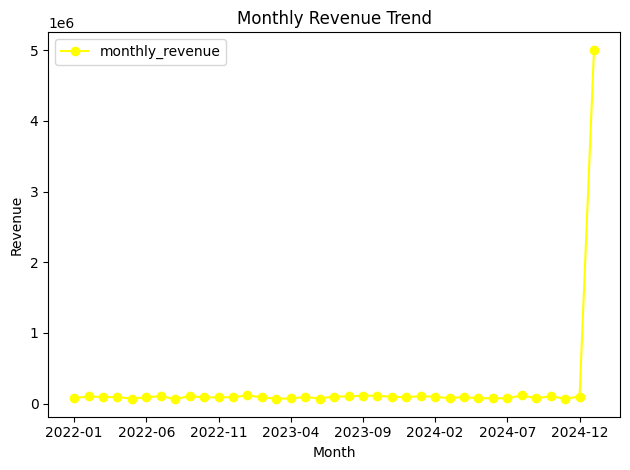

In [37]:
monthly_revenue.plot(kind='line', x='month', y='monthly_revenue', color='yellow', title='Monthly Revenue Trend', marker='o')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.tight_layout()
plt.savefig("monthly_revenue.png")
plt.show()


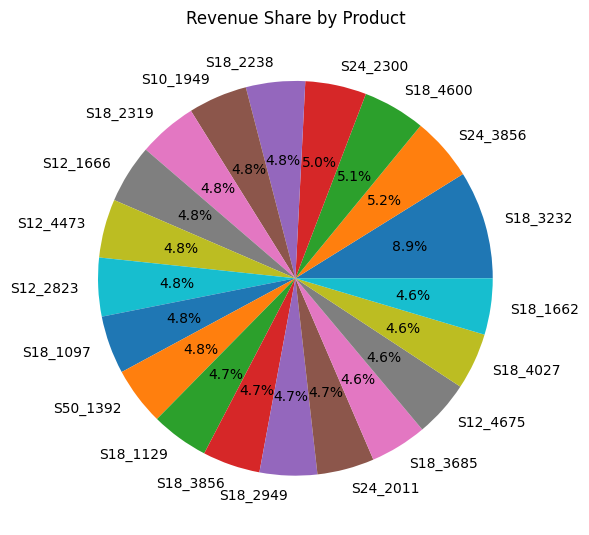

In [30]:
result.plot.pie(y='revenue', labels=result['product'], autopct='%1.1f%%', legend=False, figsize=(6, 6))
plt.title('Revenue Share by Product')
plt.ylabel('')
plt.tight_layout()
plt.savefig("revenue_pie_chart.png")
plt.show()